/var/folders/61/jlt1cd8n3m31djgmsmtg6f_h0000gn/T/ipykernel_29846/308007159.py:47: RuntimeWarning: invalid value encountered in scalar divide
  deformability = (2*np.sqrt(np.pi*area))/(perimeter)


Data has been saved to /Users/paul/Downloads/masks_video_png_8_bit.csv


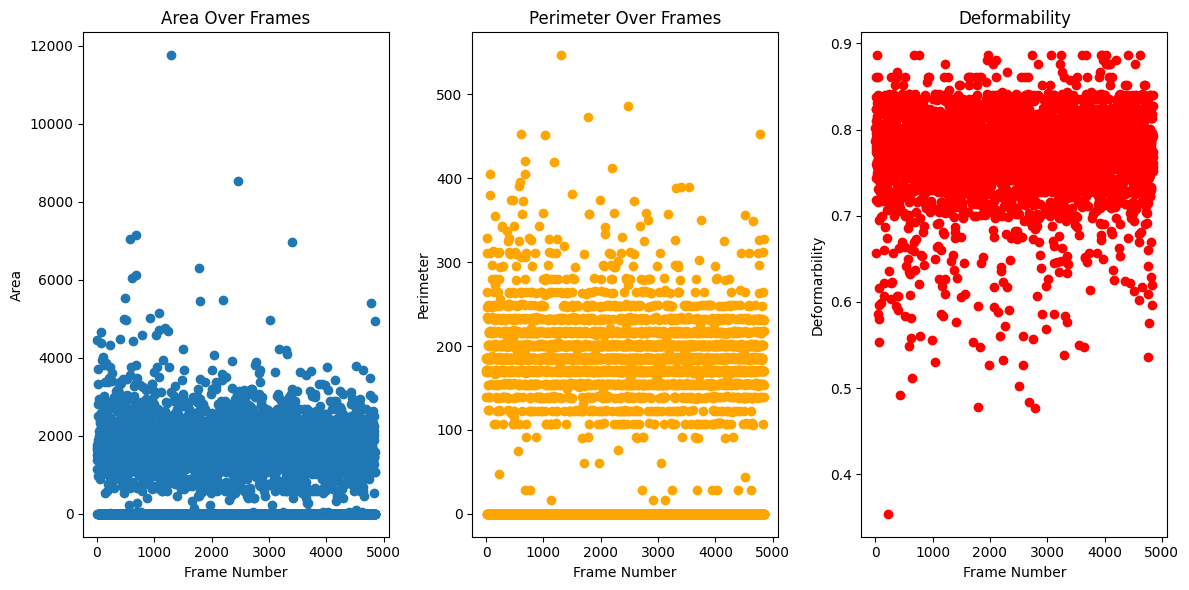

In [4]:
import cv2
import tifffile as tf
import numpy as np
import matplotlib.pyplot as plt
import csv

# Load TIFF file using tifffile
tif_file_path = '/Users/paul/Downloads/masks_video_png_8_bit.tif'
tif_stack = tf.imread(tif_file_path)

# Function to calculate area and perimeter
def calculate_area_and_perimeter(image):
    # Convert the image to three channels if it is a single channel
    if len(image.shape) == 2:
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Threshold the image to get a binary image
    _, thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Check if contours are found
    if contours:
        # Calculate area and perimeter
        area = cv2.contourArea(contours[0])
        perimeter = cv2.arcLength(contours[0], True)
        return area, perimeter
    else:
        return 0, 0  # Return zero area and perimeter if no contours are found

# List to store data for each frame
data_list = []

# Lists to store perimeters and areas
perimeters = []
areas = []
deformabilities = []

# Iterate through all frames
for frame_count, frame in enumerate(tif_stack, start=1):
    # Calculate area and perimeter for the current frame
    area, perimeter = calculate_area_and_perimeter(frame)
    deformability = (2*np.sqrt(np.pi*area))/(perimeter)

    # Append data to the list
    data_list.append({'Frame': frame_count, 'Area': area, 'Perimeter': perimeter, 'Deformability': deformability})
    # Append the values to the lists
    areas.append(area)
    perimeters.append(perimeter)
    deformabilities.append(deformability)

# Specify the CSV file path
csv_file_path = '/Users/paul/Downloads/masks_video_png_8_bit.csv'

# Write data to a CSV file
with open(csv_file_path, 'w', newline='') as csv_file:
    fieldnames = ['Frame', 'Area', 'Perimeter','Deformability']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

    # Write header
    writer.writeheader()
 # Write data for each frame
    writer.writerows(data_list)

print(f'Data has been saved to {csv_file_path}')

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.scatter(range(1, len(areas) + 1), areas, marker='o')
plt.title('Area Over Frames')
plt.xlabel('Frame Number')
plt.ylabel('Area')

plt.subplot(1, 3, 2)
plt.scatter(range(1, len(perimeters) + 1), perimeters, marker='o', color='orange')
plt.title('Perimeter Over Frames')
plt.xlabel('Frame Number')
plt.ylabel('Perimeter')

plt.subplot(1, 3, 3)
plt.scatter(range(1, len(deformabilities) + 1), deformabilities, marker='o', color='red')
plt.title('Deformability')
plt.xlabel('Frame Number')
plt.ylabel('Deformarbility')

plt.tight_layout()
plt.show()
